In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('dataseter.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Yes,NO
1,F,55,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,NO
2,F,78,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,YES
3,M,60,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,YES
4,F,80,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   object
 3   YELLOW_FINGERS         3000 non-null   object
 4   ANXIETY                3000 non-null   object
 5   PEER_PRESSURE          3000 non-null   object
 6   CHRONIC_DISEASE        3000 non-null   object
 7   FATIGUE                3000 non-null   object
 8   ALLERGY                3000 non-null   object
 9   WHEEZING               3000 non-null   object
 10  ALCOHOL_CONSUMING      3000 non-null   object
 11  COUGHING               3000 non-null   object
 12  SHORTNESS_OF_BREATH    3000 non-null   object
 13  SWALLOWING_DIFFICULTY  3000 non-null   object
 14  CHEST_PAIN             3000 non-null   object
 15  LUNG_CANCER          

In [4]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
df.duplicated().sum()

2

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# List of binary categorical columns to encode
binary_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                  'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                  'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
                  'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']

# Apply label encoding to each binary categorical column
for column in binary_columns:
    df[column] = le.fit_transform(df[column])

# Display the first few rows of the encoded dataset
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,1,1,1,0,0,1,0,0,0,0,0,0,1,0
1,0,55,1,0,0,1,1,0,0,0,1,1,1,0,0,0
2,0,78,0,0,1,1,1,0,1,0,1,1,0,1,1,1
3,1,60,0,1,1,1,0,1,0,1,1,0,1,0,0,1
4,0,80,1,1,0,1,1,0,1,0,1,1,1,1,0,0


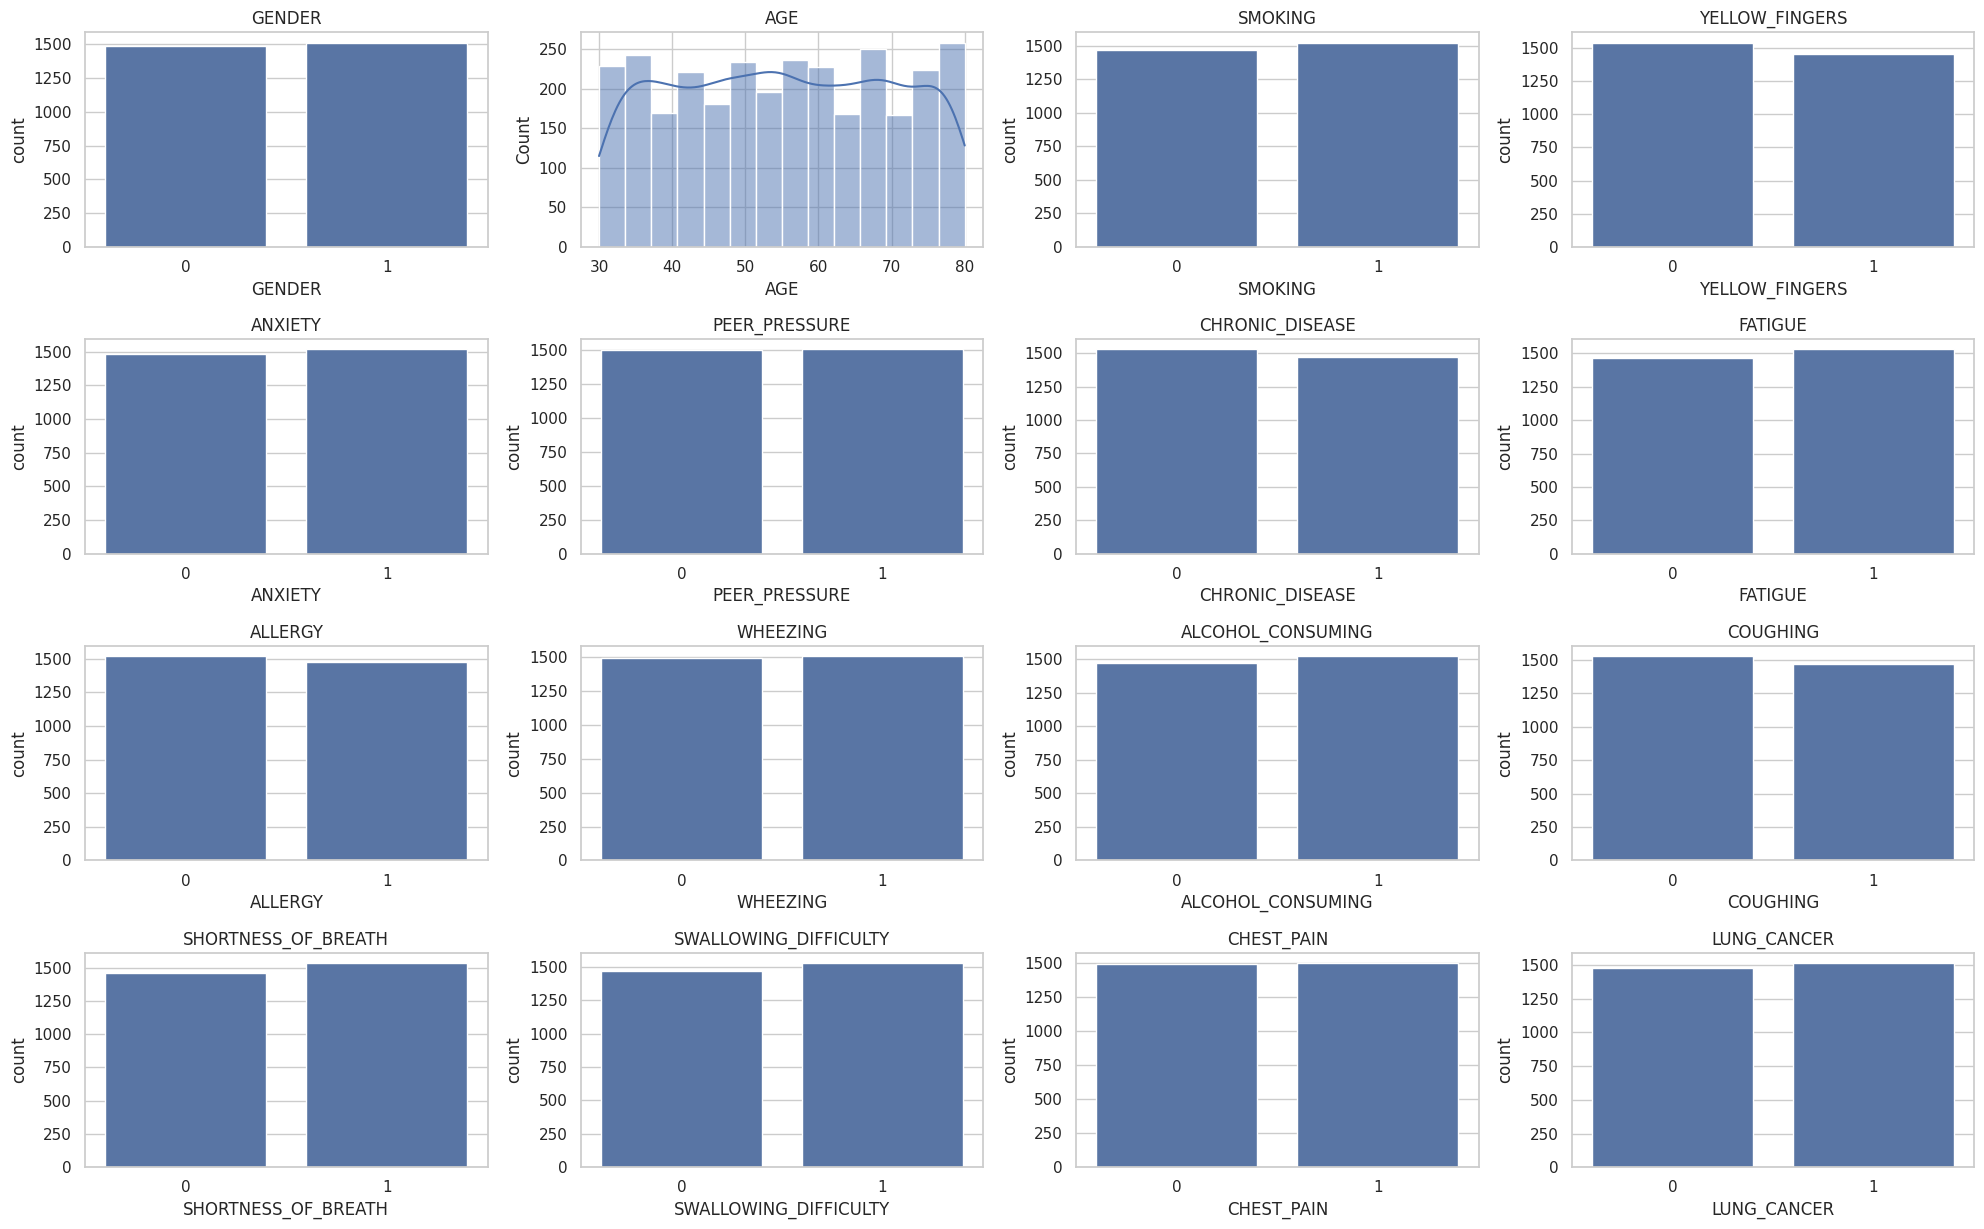

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualizations
sns.set(style="whitegrid")

# Plot the distribution of each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 4, i)
    if column == 'AGE':
        sns.histplot(df[column], kde=True)
    else:
        sns.countplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [10]:
x=df.drop(columns=['LUNG_CANCER'])
y=df[['LUNG_CANCER']]

In [11]:
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,1,65,1,1,1,0,0,1,0,0,0,0,0,0,1
1,0,55,1,0,0,1,1,0,0,0,1,1,1,0,0
2,0,78,0,0,1,1,1,0,1,0,1,1,0,1,1
3,1,60,0,1,1,1,0,1,0,1,1,0,1,0,0
4,0,80,1,1,0,1,1,0,1,0,1,1,1,1,0


In [12]:
y.head()

,LUNG_CANCER
0,0
1,0
2,1
3,1
4,0


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [18]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
).set_output(transform='pandas')

In [19]:
x_pre=num_pipeline.fit_transform(x)

In [20]:
x_pre

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,0.991365,0.667436,0.982803,1.028422,0.988063,-1.002672,-0.980837,0.979529,-0.986087,-1.005351,-1.017498,-0.979529,-1.024995,-1.020218,0.996670
1,-1.008710,-0.011643,0.982803,-0.972363,-1.012081,0.997335,1.019537,-1.020899,-0.986087,-1.005351,0.982803,1.020899,0.975614,-1.020218,-1.003341
2,-1.008710,1.550237,-1.017498,-0.972363,0.988063,0.997335,1.019537,-1.020899,1.014109,-1.005351,0.982803,1.020899,-1.024995,0.980183,0.996670
3,0.991365,0.327896,-1.017498,1.028422,0.988063,0.997335,-0.980837,0.979529,-0.986087,0.994677,0.982803,-0.979529,0.975614,-1.020218,-1.003341
4,-1.008710,1.686053,0.982803,1.028422,-1.012081,0.997335,1.019537,-1.020899,1.014109,-1.005351,0.982803,1.020899,0.975614,0.980183,-1.003341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-1.008710,1.074882,-1.017498,1.028422,0.988063,-1.002672,-0.980837,0.979529,1.014109,0.994677,0.982803,-0.979529,0.975614,0.980183,-1.003341
2996,-1.008710,1.346514,0.982803,-0.972363,0.988063,0.997335,1.019537,-1.020899,-0.986087,-1.005351,-1.017498,1.020899,0.975614,-1.020218,0.996670
2997,-1.008710,0.463712,-1.017498,-0.972363,-1.012081,0.997335,-0.980837,-1.020899,-0.986087,-1.005351,0.982803,1.020899,-1.024995,-1.020218,-1.003341
2998,0.991365,-1.709338,0.982803,1.028422,-1.012081,-1.002672,-0.980837,-1.020899,-0.986087,-1.005351,-1.017498,1.020899,-1.024995,0.980183,-1.003341


In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [24]:
xtrain.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
1570,0.991365,-0.079550,-1.017498,1.028422,0.988063,0.997335,1.019537,0.979529,1.014109,-1.005351,-1.017498,-0.979529,-1.024995,0.980183,0.996670
2230,0.991365,-0.011643,-1.017498,-0.972363,-1.012081,0.997335,1.019537,0.979529,-0.986087,-1.005351,-1.017498,1.020899,0.975614,0.980183,-1.003341
2297,-1.008710,1.346514,-1.017498,1.028422,0.988063,0.997335,-0.980837,-1.020899,1.014109,-1.005351,-1.017498,1.020899,-1.024995,0.980183,0.996670
1801,0.991365,0.395804,-1.017498,-0.972363,-1.012081,0.997335,-0.980837,0.979529,-0.986087,0.994677,0.982803,-0.979529,0.975614,0.980183,0.996670
1273,-1.008710,-0.419090,0.982803,1.028422,-1.012081,-1.002672,-0.980837,-1.020899,-0.986087,-1.005351,-1.017498,-0.979529,0.975614,-1.020218,0.996670


In [25]:
ytrain.head()

,LUNG_CANCER
1570,0
2230,0
2297,0
1801,1
1273,1


In [26]:
xtest.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
1376,-1.008710,0.803251,0.982803,1.028422,0.988063,-1.002672,1.019537,0.979529,1.014109,0.994677,-1.017498,-0.979529,-1.024995,0.980183,0.996670
932,-1.008710,-0.894444,0.982803,1.028422,-1.012081,0.997335,1.019537,0.979529,-0.986087,0.994677,-1.017498,-0.979529,-1.024995,-1.020218,-1.003341
144,-1.008710,-1.709338,0.982803,1.028422,-1.012081,0.997335,1.019537,-1.020899,1.014109,-1.005351,-1.017498,1.020899,-1.024995,0.980183,-1.003341
1753,0.991365,0.667436,-1.017498,-0.972363,-1.012081,-1.002672,-0.980837,0.979529,1.014109,0.994677,0.982803,-0.979529,0.975614,-1.020218,0.996670
51,0.991365,0.939067,-1.017498,1.028422,0.988063,0.997335,-0.980837,-1.020899,1.014109,0.994677,0.982803,-0.979529,-1.024995,-1.020218,0.996670


In [27]:
ytest.head()

,LUNG_CANCER
1376,0
932,1
144,1
1753,0
51,1


In [28]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1, max_depth=3,min_samples_split=2,min_samples_leaf=1,criterion='gini')
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, n_estimators=1)

In [29]:
model.score(xtrain,ytrain)

0.5229357798165137

In [30]:
model.score(xtest,ytest)

0.52

In [32]:
# hyperparametric tunning
params={"n_estimators":[10,50,100,200],
        "max_depth":[2,3,4,5,6,7,8],
        "min_samples_split":[5,6,7,8,7,8,9],
        "criterion":["gini","entropy"]}

In [33]:
from sklearn.model_selection import RandomizedSearchCV
rfc=RandomForestClassifier()
rscv=RandomizedSearchCV(rfc,param_distributions=params,cv=5,scoring="f1_macro")
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [5, 6, 7, 8, 7, 8,
                                                              9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [34]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'max_depth': 5,
 'criterion': 'entropy'}

In [35]:
rscv.best_score_

0.5149110534416717

In [36]:
best_rfc=rscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=7)

In [37]:
best_rfc.score(xtrain,ytrain)

0.6630525437864887

In [38]:
best_rfc.score(xtest,ytest)

0.5183333333333333

In [39]:
#predict values
ypred_tr=best_rfc.predict(xtrain)
ypred_ts=best_rfc.predict(xtest)

In [40]:
ypred_tr[0:5]

array([0, 0, 0, 1, 0])

In [41]:
ytrain.head()

,LUNG_CANCER
1570,0
2230,0
2297,0
1801,1
1273,1


In [42]:
ypred_ts[0:5]

array([0, 1, 1, 1, 1])

In [43]:
ytest.head()

,LUNG_CANCER
1376,0
932,1
144,1
1753,0
51,1


In [44]:
# create a confusion matrix
c=best_rfc.classes_
c

array([0, 1])

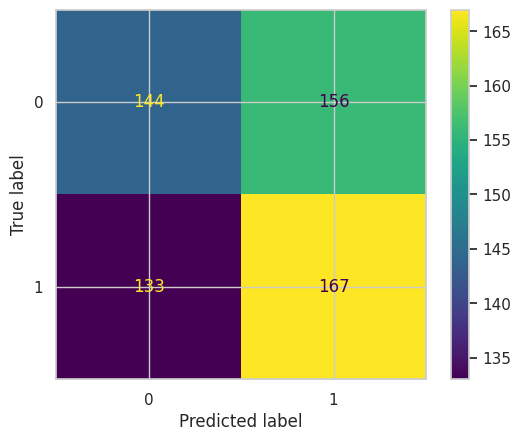

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(ytest,ypred_ts)
cmd=ConfusionMatrixDisplay(cm,display_labels=c)
cmd.plot()

In [48]:
#create a classification report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50       300
           1       0.52      0.56      0.54       300

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred_ts))


0.5183333333333333
